In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [3]:
df = pd.read_excel("./OLED_Result.xlsx")
df

,Test_Name,HIL_T,HIL_R,HTL_T,HTL_R,EML_T,EML_R,EML_D,ETL_T,ETL_R,Cathode_T,Eff,V
0,HIL_Thickness,50,0.5,900,0.9,200,0.5,0.2,250,0.5,1000,33.0,12.4
1,HIL_Thickness,70,0.5,900,0.9,200,0.5,0.2,250,0.5,1000,33.2,12.0
2,HIL_Thickness,90,0.5,900,0.9,200,0.5,0.2,250,0.5,1000,33.1,11.0
3,HIL_Ratio,70,0.3,900,0.9,200,0.5,0.2,250,0.5,1000,33.2,12.8
4,HIL_Ratio,70,0.5,900,0.9,200,0.5,0.2,250,0.5,1000,32.9,12.3
5,HIL_Ratio,70,0.7,900,0.9,200,0.5,0.2,250,0.5,1000,32.8,11.6
6,HTL_Thickness,70,0.5,850,0.9,200,0.5,0.2,250,0.5,1000,31.2,12.4
7,HTL_Thickness,70,0.5,900,0.9,200,0.5,0.2,250,0.5,1000,33.4,12.2
8,HTL_Thickness,70,0.5,950,0.9,200,0.5,0.2,250,0.5,1000,34.5,12.3
9,EML_Thickness,70,0.5,900,0.9,180,0.5,0.2,250,0.5,1000,30.0,13.0


In [4]:
df_X = df.loc[:,"Test_Name":'Cathode_T']
df_Y = df.loc[:,"Eff":'V']

In [5]:
df_X

,Test_Name,HIL_T,HIL_R,HTL_T,HTL_R,EML_T,EML_R,EML_D,ETL_T,ETL_R,Cathode_T
0,HIL_Thickness,50,0.5,900,0.9,200,0.5,0.2,250,0.5,1000
1,HIL_Thickness,70,0.5,900,0.9,200,0.5,0.2,250,0.5,1000
2,HIL_Thickness,90,0.5,900,0.9,200,0.5,0.2,250,0.5,1000
3,HIL_Ratio,70,0.3,900,0.9,200,0.5,0.2,250,0.5,1000
4,HIL_Ratio,70,0.5,900,0.9,200,0.5,0.2,250,0.5,1000
5,HIL_Ratio,70,0.7,900,0.9,200,0.5,0.2,250,0.5,1000
6,HTL_Thickness,70,0.5,850,0.9,200,0.5,0.2,250,0.5,1000
7,HTL_Thickness,70,0.5,900,0.9,200,0.5,0.2,250,0.5,1000
8,HTL_Thickness,70,0.5,950,0.9,200,0.5,0.2,250,0.5,1000
9,EML_Thickness,70,0.5,900,0.9,180,0.5,0.2,250,0.5,1000


In [6]:
df_Y

,Eff,V
0,33.0,12.4
1,33.2,12.0
2,33.1,11.0
3,33.2,12.8
4,32.9,12.3
5,32.8,11.6
6,31.2,12.4
7,33.4,12.2
8,34.5,12.3
9,30.0,13.0


## 하고 싶은 것.

1. 일단 단순하게 여러 머신러닝 기법들을 적용해보자. 
 - LinearRegression
 -  Poly
2. 단순적용 이후에는 아래의 기여도 분석기법을 만들어보자.
 -  각 평가에 대해서 기여도 분석
 -  그것을 위해서 각 평가별로 일단 유의한지 아닌지.
 -  분산분석을 통한 유의여부 확인.
 -  유의하다면 회귀식 도출을 통해 예상 수치 확인.
 -  차수별 재현성 확보 후 회귀성의 재현성 확인. 



In [7]:
df_X

,Test_Name,HIL_T,HIL_R,HTL_T,HTL_R,EML_T,EML_R,EML_D,ETL_T,ETL_R,Cathode_T
0,HIL_Thickness,50,0.5,900,0.9,200,0.5,0.2,250,0.5,1000
1,HIL_Thickness,70,0.5,900,0.9,200,0.5,0.2,250,0.5,1000
2,HIL_Thickness,90,0.5,900,0.9,200,0.5,0.2,250,0.5,1000
3,HIL_Ratio,70,0.3,900,0.9,200,0.5,0.2,250,0.5,1000
4,HIL_Ratio,70,0.5,900,0.9,200,0.5,0.2,250,0.5,1000
5,HIL_Ratio,70,0.7,900,0.9,200,0.5,0.2,250,0.5,1000
6,HTL_Thickness,70,0.5,850,0.9,200,0.5,0.2,250,0.5,1000
7,HTL_Thickness,70,0.5,900,0.9,200,0.5,0.2,250,0.5,1000
8,HTL_Thickness,70,0.5,950,0.9,200,0.5,0.2,250,0.5,1000
9,EML_Thickness,70,0.5,900,0.9,180,0.5,0.2,250,0.5,1000


In [8]:
X = df_X.iloc[:,1:].values
X_b = np.c_[np.ones((len(df),1)),X]
X_b

array([[1.0e+00, 5.0e+01, 5.0e-01, 9.0e+02, 9.0e-01, 2.0e+02, 5.0e-01,
        2.0e-01, 2.5e+02, 5.0e-01, 1.0e+03],
       [1.0e+00, 7.0e+01, 5.0e-01, 9.0e+02, 9.0e-01, 2.0e+02, 5.0e-01,
        2.0e-01, 2.5e+02, 5.0e-01, 1.0e+03],
       [1.0e+00, 9.0e+01, 5.0e-01, 9.0e+02, 9.0e-01, 2.0e+02, 5.0e-01,
        2.0e-01, 2.5e+02, 5.0e-01, 1.0e+03],
       [1.0e+00, 7.0e+01, 3.0e-01, 9.0e+02, 9.0e-01, 2.0e+02, 5.0e-01,
        2.0e-01, 2.5e+02, 5.0e-01, 1.0e+03],
       [1.0e+00, 7.0e+01, 5.0e-01, 9.0e+02, 9.0e-01, 2.0e+02, 5.0e-01,
        2.0e-01, 2.5e+02, 5.0e-01, 1.0e+03],
       [1.0e+00, 7.0e+01, 7.0e-01, 9.0e+02, 9.0e-01, 2.0e+02, 5.0e-01,
        2.0e-01, 2.5e+02, 5.0e-01, 1.0e+03],
       [1.0e+00, 7.0e+01, 5.0e-01, 8.5e+02, 9.0e-01, 2.0e+02, 5.0e-01,
        2.0e-01, 2.5e+02, 5.0e-01, 1.0e+03],
       [1.0e+00, 7.0e+01, 5.0e-01, 9.0e+02, 9.0e-01, 2.0e+02, 5.0e-01,
        2.0e-01, 2.5e+02, 5.0e-01, 1.0e+03],
       [1.0e+00, 7.0e+01, 5.0e-01, 9.5e+02, 9.0e-01, 2.0e+02, 5.0e-01,
 

In [9]:
Y = df_Y.values

### 1. Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_

(array([-31.26666667,  21.56666667]),
 array([[ 2.50e-03, -1.00e+00,  3.30e-02,  0.00e+00,  1.75e-01,  0.00e+00,
          0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00],
        [-3.50e-02, -3.00e+00, -1.00e-03,  0.00e+00, -2.25e-02,  0.00e+00,
          0.00e+00,  0.00e+00,  0.00e+00,  0.00e+00]]))

In [11]:
Y_new = lin_reg.predict(X)
np.max(lin_reg.coef_)

0.17499999999999996

In [12]:
np.average(abs(Y_new - Y)/Y * 100, axis=0)

array([0.58844681, 1.79183892])

### 2. Gradient Descent

In [13]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.rand(11,2)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
    theta = theta - eta * gradients
    print(theta)

[[-1.71711796e+01 -1.91242553e+01]
 [-1.26346570e+03 -1.36999772e+03]
 [-8.32379642e+00 -8.96637591e+00]
 [-1.62443292e+04 -1.76103549e+04]
 [-1.58289256e+01 -1.73446002e+01]
 [-3.60842552e+03 -3.91323985e+03]
 [-8.99213999e+00 -9.05412525e+00]
 [-2.77152086e+00 -3.20439866e+00]
 [-4.51060823e+03 -4.88994118e+03]
 [-8.02208360e+00 -9.33841110e+00]
 [-1.80426445e+04 -1.95634196e+04]]
[[8.30392388e+05 9.00312878e+05]
 [5.81294272e+07 6.30240621e+07]
 [4.15196457e+05 4.50157036e+05]
 [7.47514803e+08 8.10457295e+08]
 [7.47352774e+05 8.10281458e+05]
 [1.66084077e+08 1.80068748e+08]
 [4.15195787e+05 4.50156947e+05]
 [1.66079140e+05 1.80063196e+05]
 [2.07597879e+08 2.25078111e+08]
 [4.15196757e+05 4.50156663e+05]
 [8.30391516e+08 9.00312439e+08]]
[[-3.82153858e+10 -4.14332111e+10]
 [-2.67517001e+12 -2.90042561e+12]
 [-1.91076930e+10 -2.07166056e+10]
 [-3.44013222e+13 -3.72979944e+13]
 [-3.43938473e+10 -3.72898900e+10]
 [-7.64334290e+12 -8.28693032e+12]
 [-1.91076929e+10 -2.07166055e+10]
 [-7.

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  



[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 

[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [

[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [

 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 

[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [

[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]]
[[nan nan]
 [nan nan]
 [

In [14]:
theta

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan]])

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, Y[:,0])

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [16]:
sgd_reg.intercept_, sgd_reg.coef_

(array([-5.89657752e+08]),
 array([-6.15719061e+12,  1.76805282e+10,  1.24329134e+12, -5.30691977e+08,
        -7.28791245e+11, -2.94828876e+08, -1.17931550e+08, -1.47414438e+11,
        -2.94828876e+08, -5.89657752e+11]))

In [17]:
y = Y[:,0]

In [18]:
y_new = sgd_reg.predict(X)
y_new

array([ 3.88405190e+13, -8.43032933e+13, -2.07447106e+14, -8.43068294e+13,
       -8.43032933e+13, -8.42997572e+13, -1.46467860e+14, -8.43032933e+13,
       -2.21387263e+13, -6.97274684e+13, -8.43032933e+13, -9.88791182e+13])

In [19]:
y_new - y

array([ 3.88405190e+13, -8.43032933e+13, -2.07447106e+14, -8.43068294e+13,
       -8.43032933e+13, -8.42997572e+13, -1.46467860e+14, -8.43032933e+13,
       -2.21387263e+13, -6.97274684e+13, -8.43032933e+13, -9.88791182e+13])

In [20]:
X2 = df.loc[9:11, 'EML_T'].values
y = df.loc[9:11, 'Eff'].values
X2, y

(array([180, 200, 220], dtype=int64), array([30., 33., 37.]))

In [21]:
X2 = X2.reshape(-1,1)
y = y.reshape(-1,1)

In [22]:
sgd_reg.fit(X2, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [23]:
sgd_reg.coef_, sgd_reg.intercept_[0]

(array([1.49224189e+12]), 38351579671.959175)

## 회사 데이터 정리용.
- 단순적용 이후에는 아래의 기여도 분석기법을 만들어보자.
- 각 평가에 대해서 기여도 분석
- 그것을 위해서 각 평가별로 일단 유의한지 아닌지.
- 분산분석을 통한 유의여부 확인.
- 유의하다면 회귀식 도출을 통해 예상 수치 확인.
- 차수별 재현성 확보 후 회귀성의 재현성 확인.

적용 순서
1. Test Name 별로 그냥 나눔. 그리고 Column 중에 전부 같지 않은 항목들에 대해 X 변수로 지정.


In [25]:
test_series = df['Test_Name'].unique()
test_series

array(['HIL_Thickness', 'HIL_Ratio', 'HTL_Thickness', 'EML_Thickness'],
      dtype=object)

In [26]:
a = test_series[0]
df_Test = df.loc[df['Test_Name']==a]
df_Test

,Test_Name,HIL_T,HIL_R,HTL_T,HTL_R,EML_T,EML_R,EML_D,ETL_T,ETL_R,Cathode_T,Eff,V
0,HIL_Thickness,50,0.5,900,0.9,200,0.5,0.2,250,0.5,1000,33.0,12.4
1,HIL_Thickness,70,0.5,900,0.9,200,0.5,0.2,250,0.5,1000,33.2,12.0
2,HIL_Thickness,90,0.5,900,0.9,200,0.5,0.2,250,0.5,1000,33.1,11.0


In [27]:
df_cols = df_Test.iloc[:,1:-2].columns
df_cols

Index(['HIL_T', 'HIL_R', 'HTL_T', 'HTL_R', 'EML_T', 'EML_R', 'EML_D', 'ETL_T',
       'ETL_R', 'Cathode_T'],
      dtype='object')

### 각 Test_Name 별로 Graph 확인하기.
1. 실제값과 회귀값들의 차이 scatter plot으로 확인
2. Box plot으로 각 값들의 분포 확인.
3. p-value 확인 하고 유의한지 여부 확인.

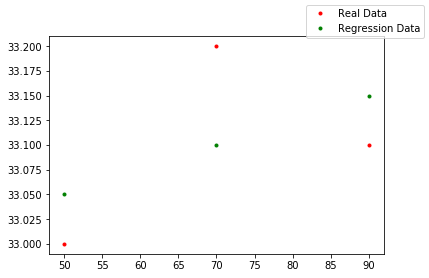

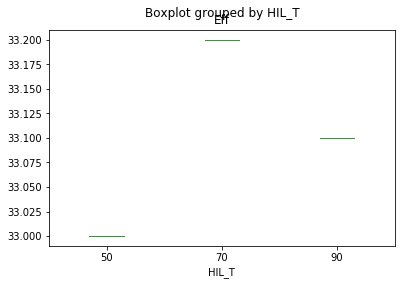

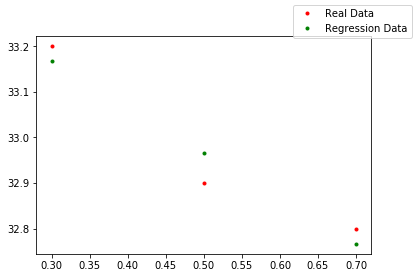

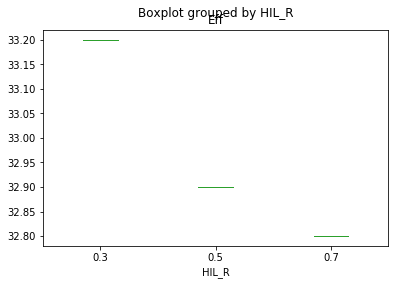

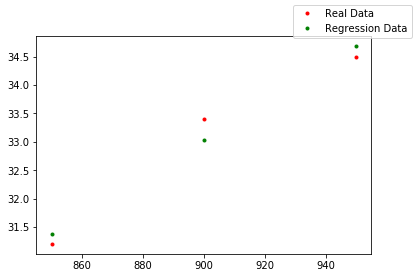

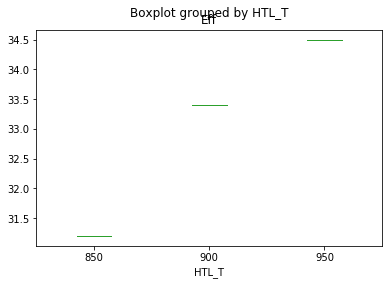

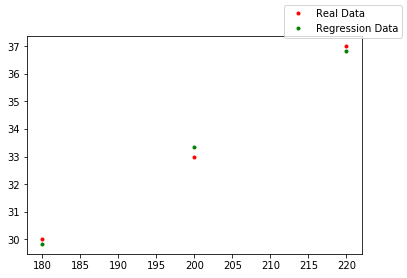

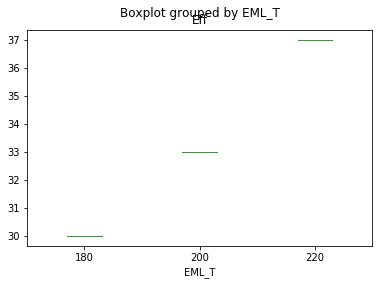

In [106]:
# 경고 메세지 무시하기
import warnings
warnings.filterwarnings('ignore')

df_lig = pd.DataFrame()
i = 0
for test in test_series:
    df_Test = df.loc[df['Test_Name']==test]
    for col in df_cols:
        if len(df_Test[col].unique()) >1:
            test_col = col
            
            # 회귀모델 확인.
            LR = LinearRegression()
            X = df_Test[col].values
            y = df_Test["Eff"].values
            X = X.reshape(-1,1)
            y = y.reshape(-1,1)
            LR.fit(X, y)
            y_new = LR.predict(X)
            
            # 실제값과 회귀모델에 따른 예상값 Scatter plot
            fig = plt.figure()
            ax = fig.add_subplot(111)
            ax.plot(X, y, 'r.', label='Real Data')
            ax.plot(X, y_new, 'g.', label='Regression Data')
            fig.legend()
            plt.show()
            
            # Box Plot 그리기
            df_Test.boxplot(column='Eff',by=col, grid=False)
            plt.show()
            # statsmodel을 활용한 일원분산분석
            # the "C" indicates categorical data
            model = ols('Eff ~ {0}'.format(col), df_Test).fit()
            print(model)
            
            # df_lig에 회귀식 데이터 넣기(1차선형회귀)
            df_lig.loc[i, 'Test'] = col
            df_lig.loc[i, 'coef'] = LR.coef_[0]
            df_lig.loc[i, 'intercept'] = LR.intercept_[0]
            

            i = i+ 1

### df_lig DataFrame 보충하기

In [55]:
# 각 Layer 평가 별 평균값 넣기
for col in df_cols:
    df_lig.loc[df_lig['Test']==col, 'mean'] = df.describe().loc['mean', col]

# 예상 변화량 넣기    
test_category_dict = {'T': 30, 'R':0.1, 'D':0.01}

def category_str(str):
    return str[-1]

df_lig['category_str'] = [category_str(z) for z in df_lig['Test']]
df_lig['delta'] = [test_category_dict[z] for z in df_lig['category_str']]

df_lig['Interpret'] = df_lig['delta'] * abs(df_lig['coef']) / df_lig['mean'] * 100 # interpret = delta * abs(coef) /mean * 100

# 예상변화량 단위 바꾸기.
df_lig['Interpret'] = df_lig['Interpret'].round(decimals=2)
df_lig